### Determination of refraction index

In [78]:
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [79]:
filenames = ['Data_Air_to_Glass.txt', 'Data_Intensity_no_polirization.txt']

Data_angles = np.loadtxt(filenames[0])

theta1 = Data_angles[:, 0]
thetam = Data_angles[:, 1]

# Convert into radians
theta1 = theta1 * np.pi/180
thetam = thetam * np.pi/180

# Calculate real angle
theta2 = theta1 - thetam

In [80]:
# Uncertainties if we use the ophobningslov
# theta1_err = abs(np.cos(theta1) * 0.5 * np.pi/180)
# theta2_err = abs(np.cos(theta2) * 0.5 * np.pi/180)

# Uncertainty bruteforce
theta1_err = abs(np.sin(0.5 * np.pi/180))
theta2_err = abs(np.sin(0.5 * np.pi/180))

The index of refraction for the glass is 1.5269 plusminus 0.007


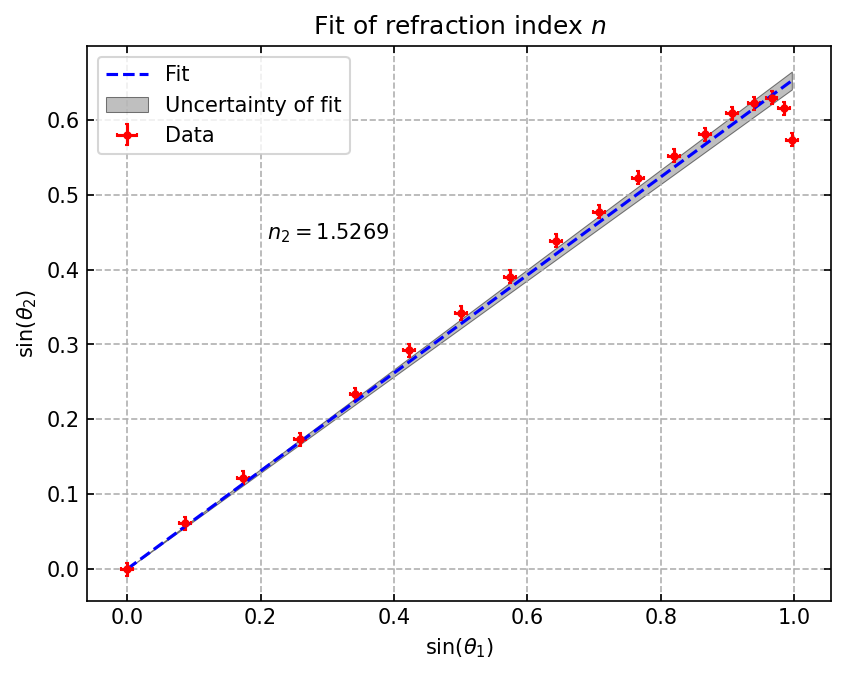

In [81]:
def n_fit(theta1, n):
    return theta1 / n

n_guess = 2

p_opt, p_cov = sp.curve_fit(n_fit, np.sin(theta1), np.sin(theta2), sigma = theta2_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1), np.sin(theta2), xerr = theta1_err, yerr = theta2_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1), n_fit(np.sin(theta1), p_opt[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1), n_fit(np.sin(theta1), p_opt[0] - 4*np.sqrt(p_cov[0][0])), n_fit(np.sin(theta1), p_opt[0] + 4* np.sqrt(p_cov[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.21, 0.44, f'$n_2 = {round(p_opt[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt[0], 4), round(np.sqrt(p_cov[0][0]), 4)))
plt.show()


Here we could make a fit for n by using glas to air instead and then make a comparison

### Analaysis of the Intensity

In [82]:
# Defining all the functions for the intensity
def refracted_p(angle1, angle2):
    return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2

def refracted_s(angle1, angle2):
    return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2

def transmitted_p(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))

def transmitted_s(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2

intensity_functions = [refracted_p, refracted_s, transmitted_p, transmitted_s]


Theoretical reflection and transmission (Air to Glass)

C:\Users\hanse\AppData\Local\Temp\ipykernel_8964\1299683121.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2
C:\Users\hanse\AppData\Local\Temp\ipykernel_8964\1299683121.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2


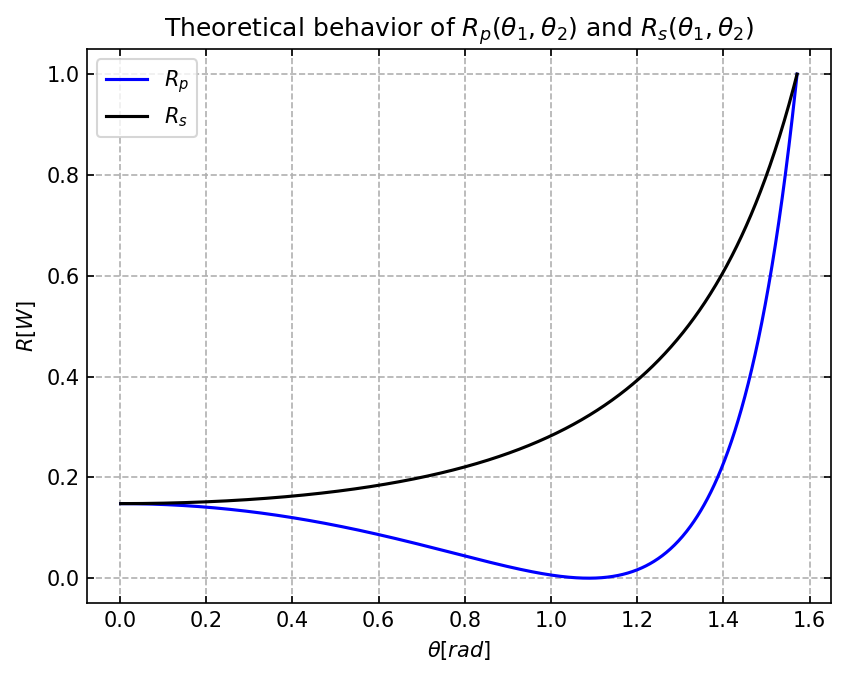

In [83]:
# Creating theoractical values for the angles
theoretical_theta1 = np.linspace(0, 90, 1000) * np.pi/180
theoretical_thetam = np.linspace(0, 50, 1000) * np.pi/180
theoretical_theta2 = theoretical_theta1 - theoretical_thetam

# Plotting reflection
plt.plot(theoretical_theta1, refracted_p(theoretical_theta1, theoretical_theta2), '-', color = 'blue', label = r'$R_p$')
plt.plot(theoretical_theta1, refracted_s(theoretical_theta1, theoretical_theta2), '-', color = 'black', label = r'$R_s$')

# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $R_p(\theta_1, \theta_2)$ and $R_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$R [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

C:\Users\hanse\AppData\Local\Temp\ipykernel_8964\1299683121.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))
C:\Users\hanse\AppData\Local\Temp\ipykernel_8964\1299683121.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2


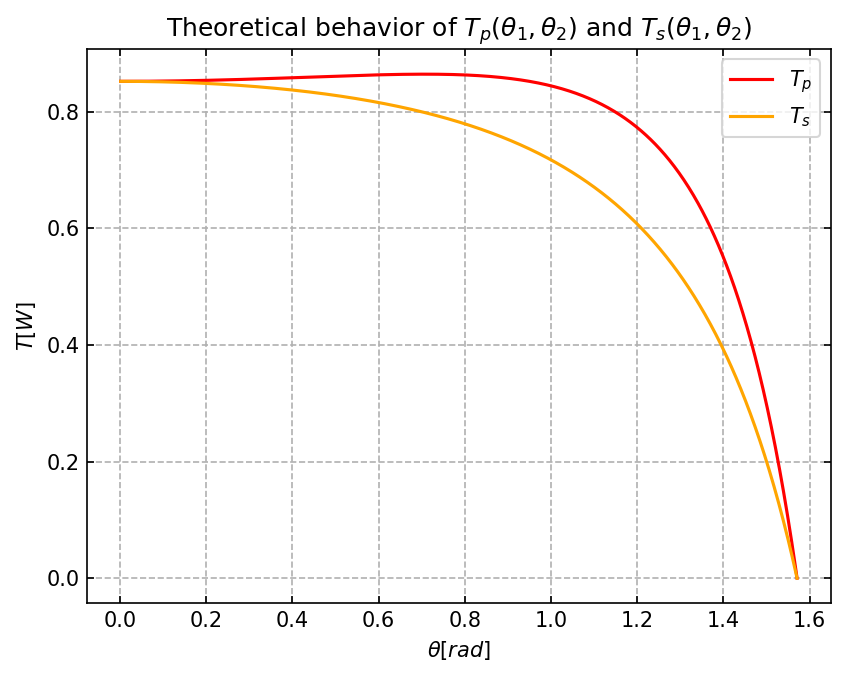

In [84]:
# Plotting transmission
plt.plot(theoretical_theta1, transmitted_p(theoretical_theta1, theoretical_theta2), '-', color = 'red', label = r'$T_p$')
plt.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2), '-', color = 'orange', label = r'$T_s$')

# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $T_p(\theta_1, \theta_2)$ and $T_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$T [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

Theoretical reflection and transmission (Glass to Air)

Dataanalysis of the intensity

In [86]:
Data_volts = Data_angles[:, 2]
volt_err = Data_angles[:, 3] * 1e-3

IndexError: index 2 is out of bounds for axis 1 with size 2

C:\Users\hanse\AppData\Local\Temp\ipykernel_8964\1299683121.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2


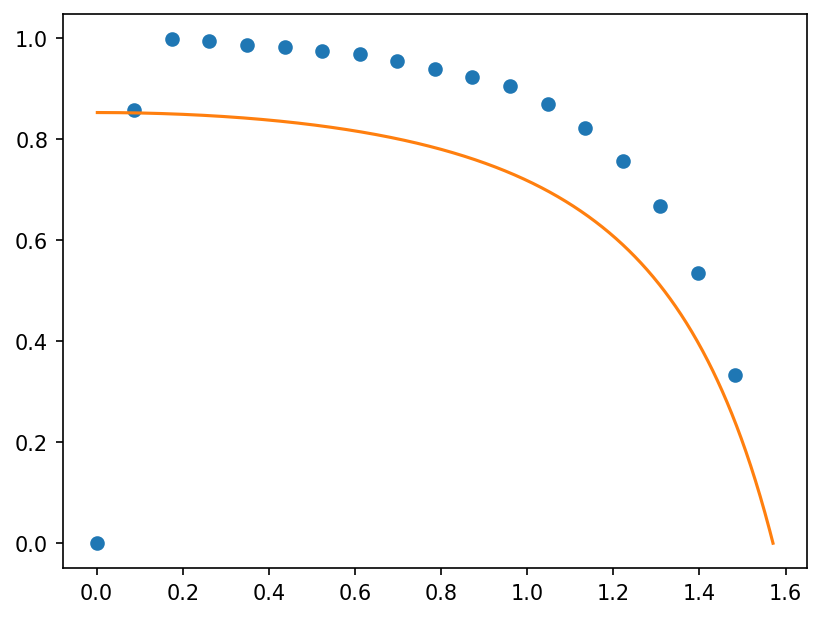

In [ ]:
plt.plot(theta1, transmitted_s(theta1, theta2), 'o')
plt.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2))